In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

impute = KNNImputer() 

In [75]:
df=pd.read_csv("austo_automobile+(2)+(1).csv")

In [71]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [67]:
df.shape

(1581, 14)

In [21]:
# df=pd.read_csv("austo_automobile+(2)+(1).csv")
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [72]:
df['Partner_salary'] = impute.fit_transform(df[['Partner_salary']])

In [73]:
df["Gender"].fillna("Others", inplace=True)
df['Gender']=np.where(df['Gender']=="Femal", "Female", df['Gender'])
df['Gender']=np.where(df['Gender']=="Femle", "Female", df['Gender'])

In [74]:
df.drop(['Education'], axis=1, inplace=True)

In [4]:

df['Gender'].unique()
df['Education'].value_counts()
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20225.559322,18905.183912,0.0,0.0,24900.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


<AxesSubplot: xlabel='Make', ylabel='count'>

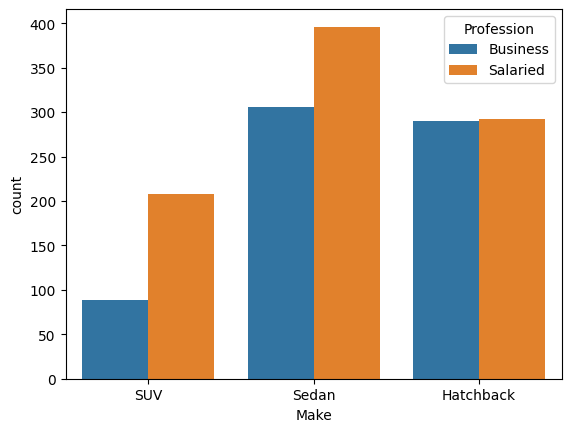

In [40]:
sns.countplot(x='Make', hue='Profession', data=df)

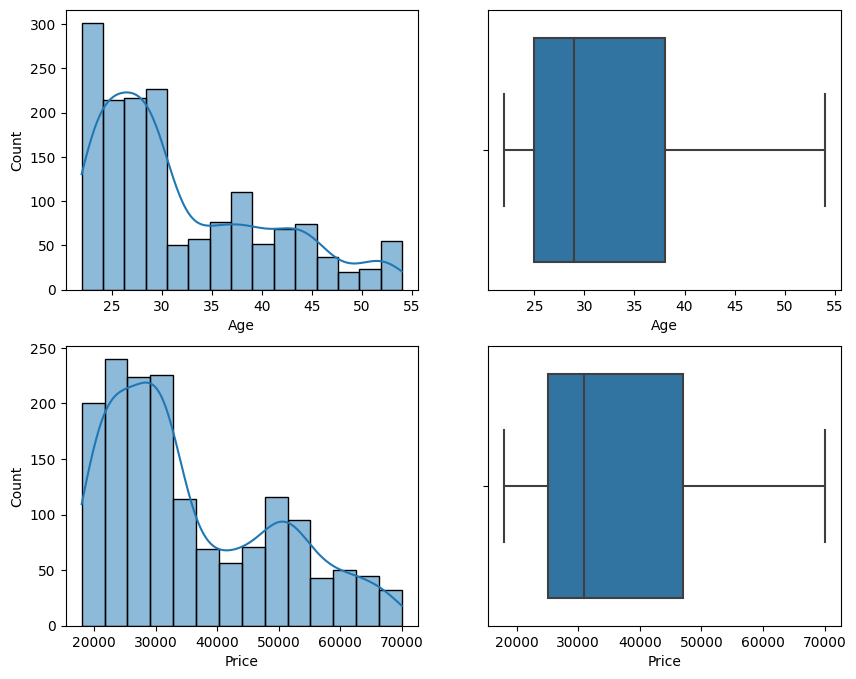

In [55]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Price'], kde=True, ax=axes[1][0])
sns.boxplot(x='Price', data=df, ax=axes[1][1])
plt.show()

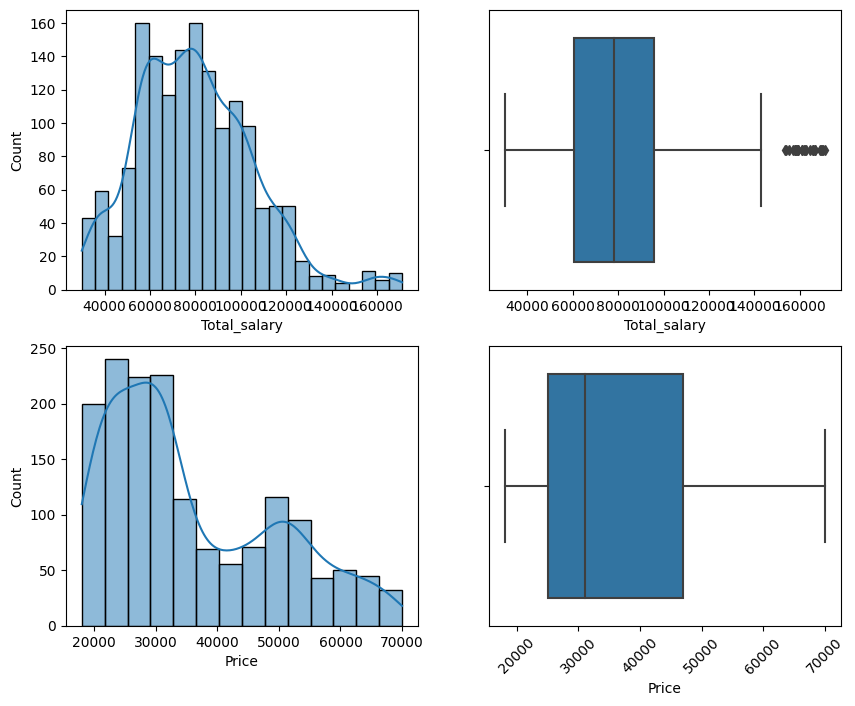

In [108]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(df['Total_salary'], kde=True, ax=axes[0][0])

sns.boxplot(x='Total_salary', data=df, ax=axes[0][1])
sns.histplot(df['Price'], kde=True, ax=axes[1][0])
sns.boxplot(x='Price', data=df, ax=axes[1][1])
plt.xticks(rotation=45)
plt.show()

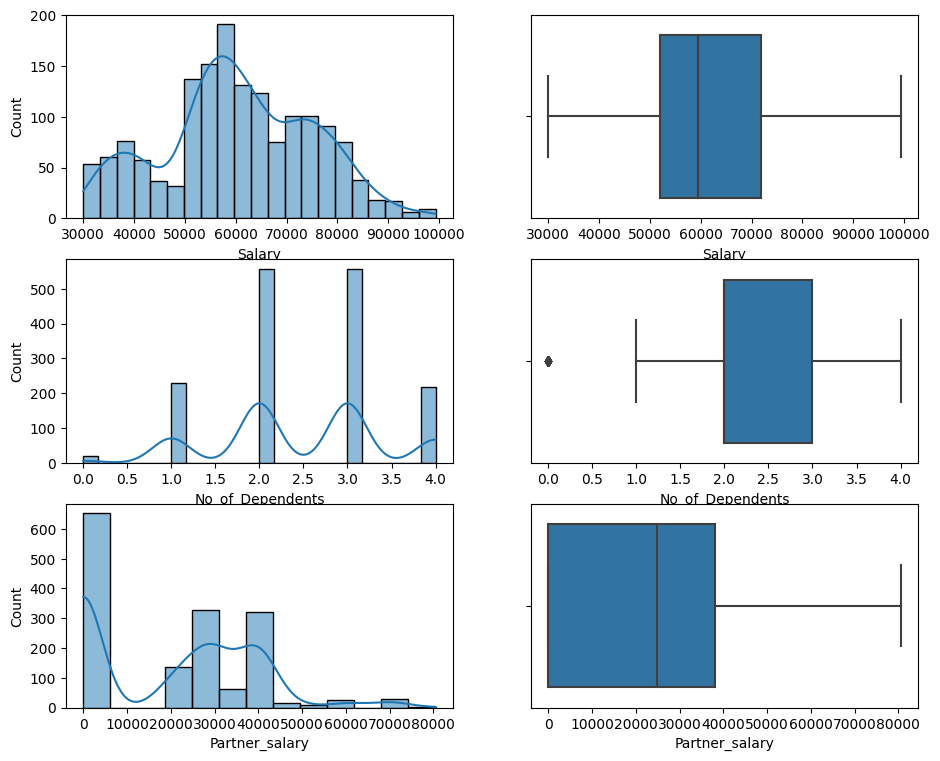

In [65]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(11,9))
sns.histplot(df['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=df, ax=axes[0][1])
sns.histplot(df['No_of_Dependents'], kde=True, ax=axes[1][0])
sns.boxplot(x='No_of_Dependents', data=df, ax=axes[1][1])
sns.histplot(df['Partner_salary'], kde=True, ax=axes[2][0])
sns.boxplot(x='Partner_salary', data=df, ax=axes[2][1])
plt.show()

In [93]:
dups=df.duplicated()
print(dups.sum())

0


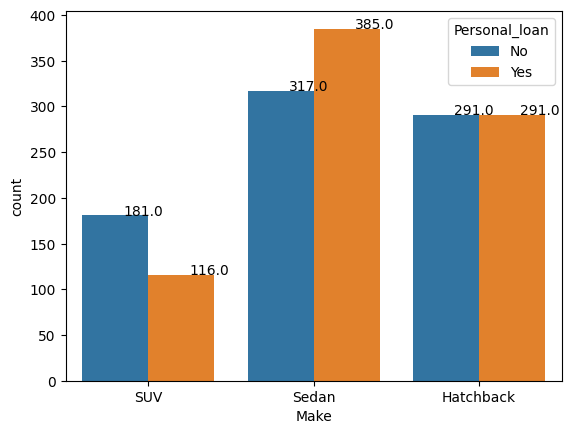

In [73]:
ax = sns.countplot(x='Make', hue='Personal_loan', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

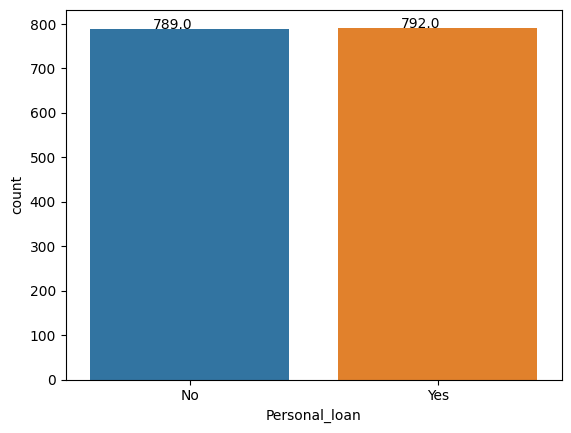

In [118]:
ax = sns.countplot(x='Personal_loan', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

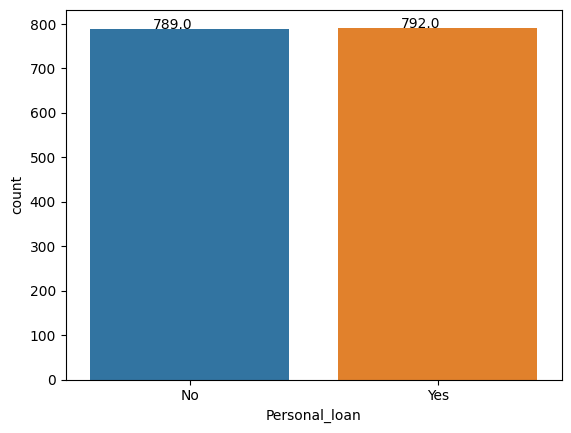

In [98]:
# ax = sns.countplot(x='Personal_loan', hue='House_loan', data=df)
# for p in ax.patches:
#    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))
# sns.countplot(x='House_loan', data=df)
ax = sns.countplot(x='Personal_loan', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

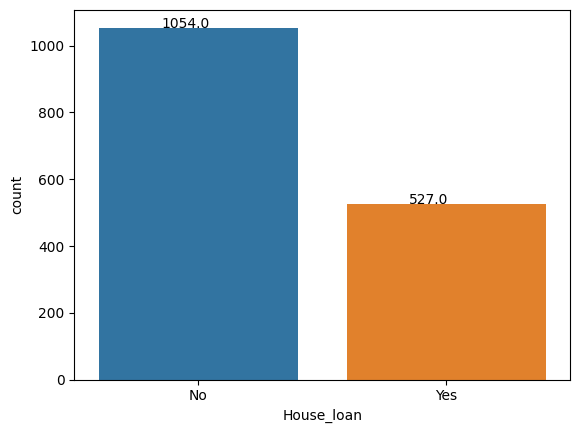

In [99]:
ax = sns.countplot(x='House_loan', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

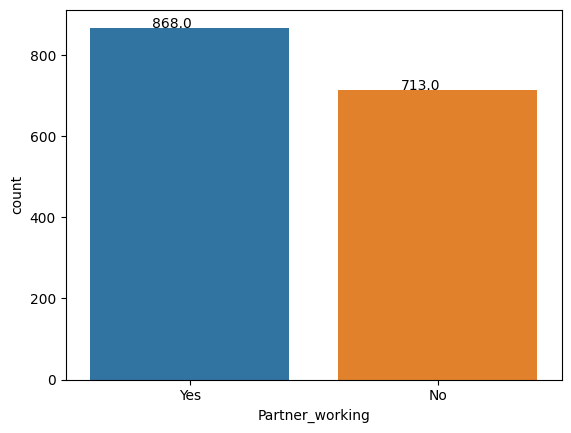

In [100]:
ax = sns.countplot(x='Partner_working', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

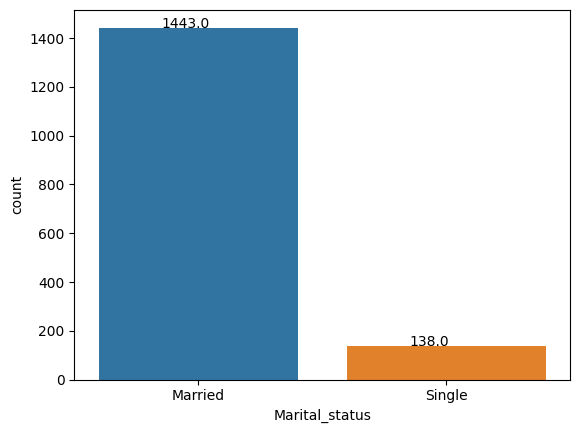

In [97]:
ax = sns.countplot(x='Marital_status', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

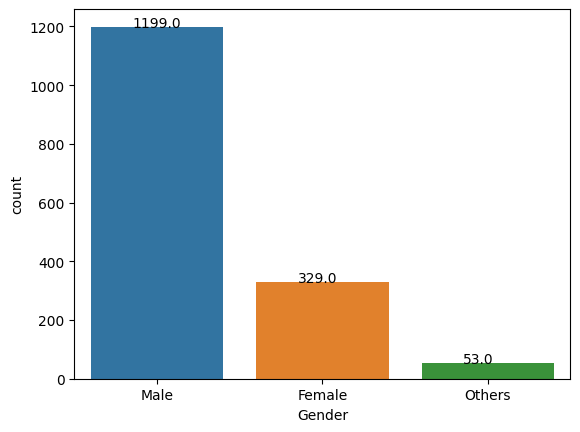

In [96]:
ax = sns.countplot(x='Gender', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

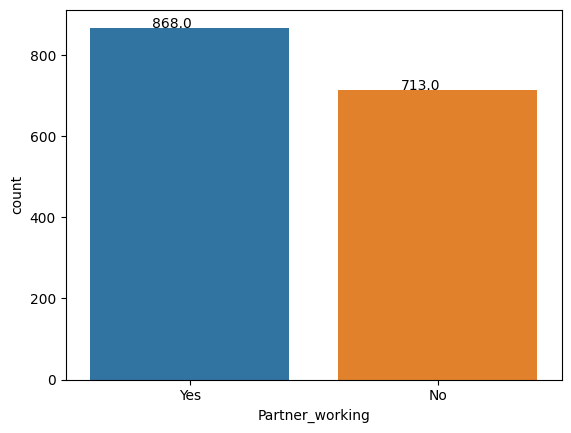

In [71]:
ax = sns.countplot(x='Partner_working', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

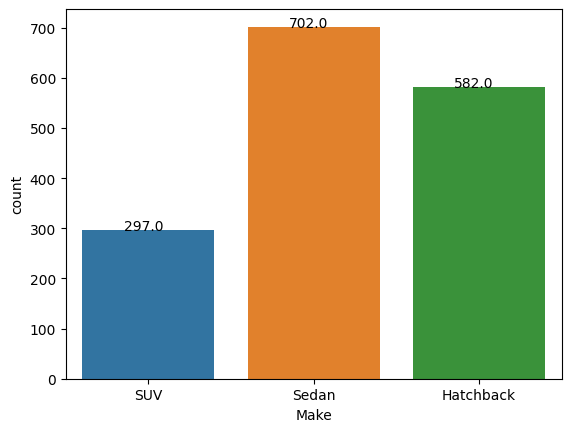

In [70]:
ax = sns.countplot(x='Make', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

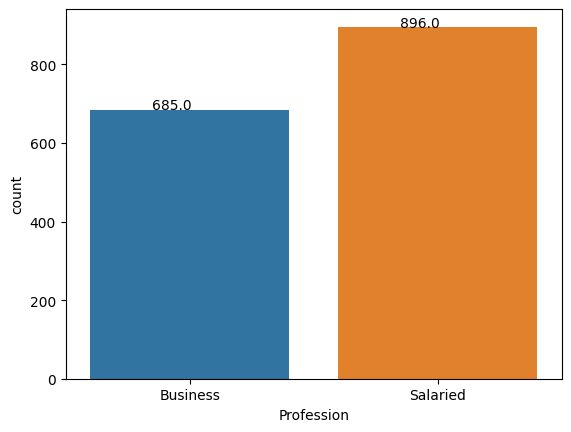

In [74]:
ax = sns.countplot(x='Profession', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

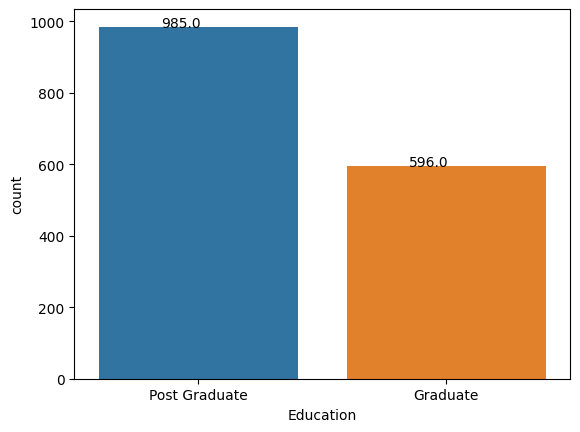

In [78]:
ax = sns.countplot(x='Education', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

<AxesSubplot: xlabel='Make', ylabel='Total_salary'>

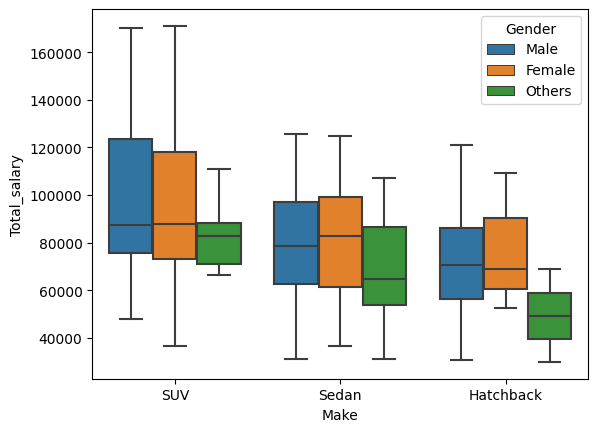

In [113]:
# sns.boxplot(x='Education', y='Price', data=df)
# sns.boxplot(x='Make', y='Salary', hue='Gender', data=df)
sns.boxplot(x='Make', y='Total_salary', hue='Gender', data=df)

<AxesSubplot: xlabel='Partner_working', ylabel='Price'>

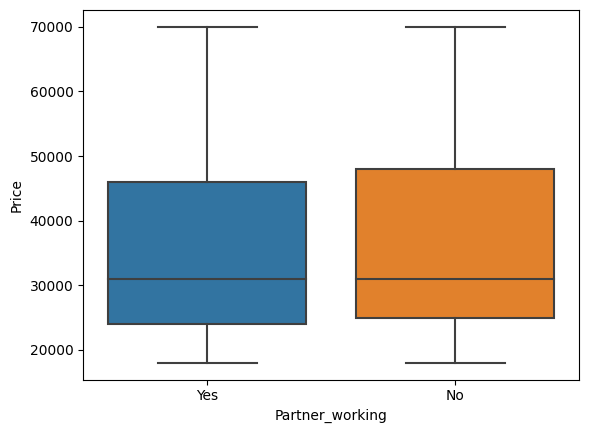

In [119]:
sns.boxplot(x='Partner_working', y='Price', data=df)

In [34]:
Total = df['Price'].sum()
print(Total)

56280000


In [53]:
def percentage_change(col1,col2):
    
    return ((((col1 - col2) / (col1)) * 100) - 100) * -1
    
df['Percentage'] = percentage_change(df['Total_salary'],df['Price'])  

df.head()

,Age,Gender,Profession,Marital_status,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Percentage
0,53,Male,Business,Married,4,No,No,Yes,99300,70700.0,170000,61000,SUV,35.882353
1,53,Female,Salaried,Married,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,36.791315
2,53,Female,Salaried,Married,3,No,No,Yes,97300,60700.0,158000,57000,SUV,36.075949
3,53,Female,Salaried,Married,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,42.717087
4,53,Male,Salaried,Married,3,No,No,Yes,79700,60200.0,139900,57000,SUV,40.743388


<AxesSubplot: xlabel='Percentage', ylabel='Count'>

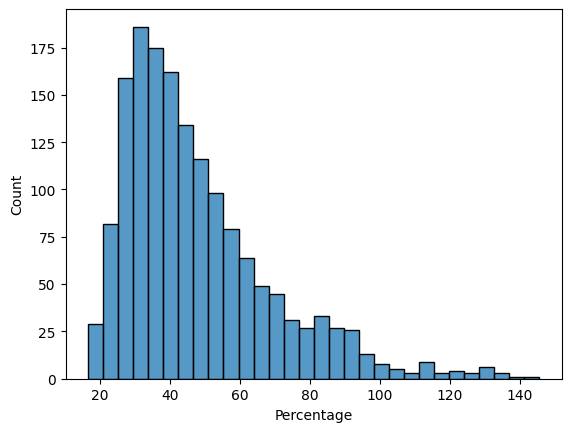

In [54]:
sns.histplot(x='Percentage', data=df)

<AxesSubplot: xlabel='Price', ylabel='Total_salary'>

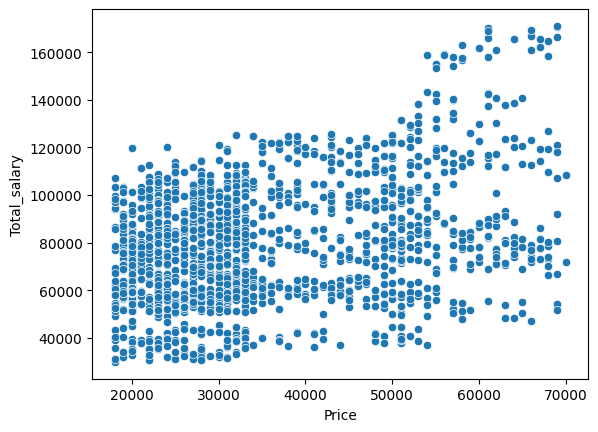

In [33]:
sns.scatterplot(x='Price', y='Total_salary', data=df)

<AxesSubplot: xlabel='Make', ylabel='Salary'>

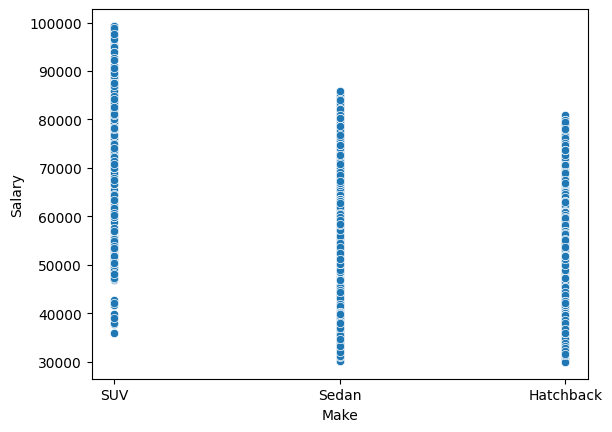

In [109]:
# sns.scatterplot(x='Education', y='Salary', data=df)
sns.scatterplot(x='Make', y='Salary', data=df)

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_2184\2558996770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

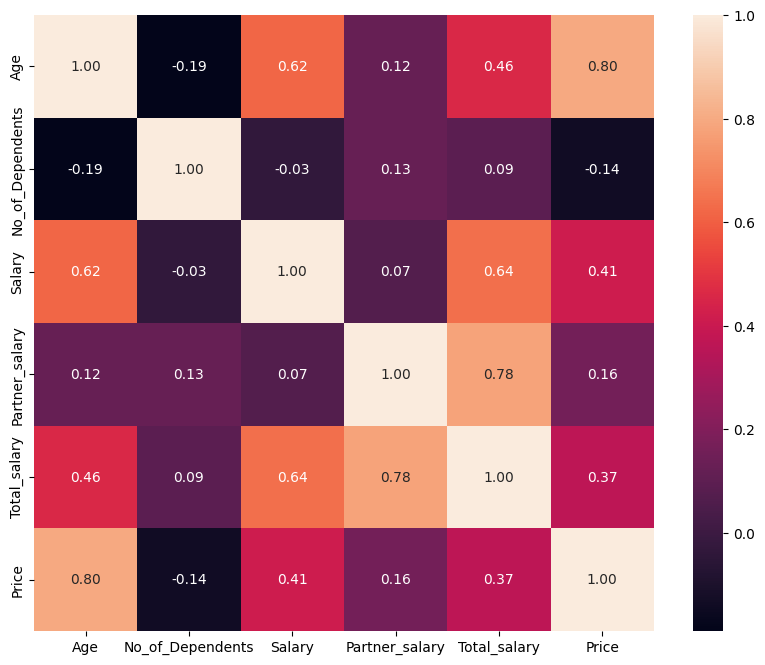

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

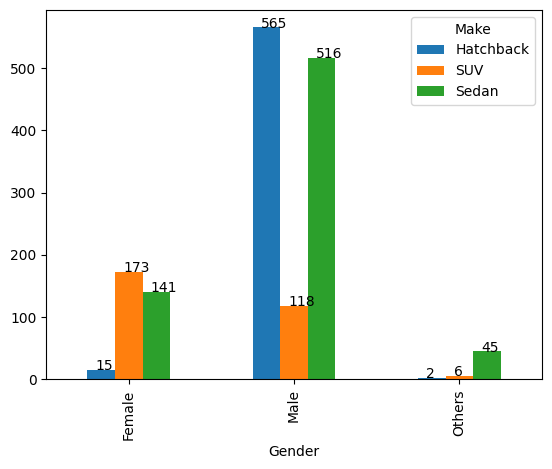

In [27]:
dfPlot=pd.crosstab(index=df['Gender'], columns=df['Make'])
ax=dfPlot.plot.bar()
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+0.01))

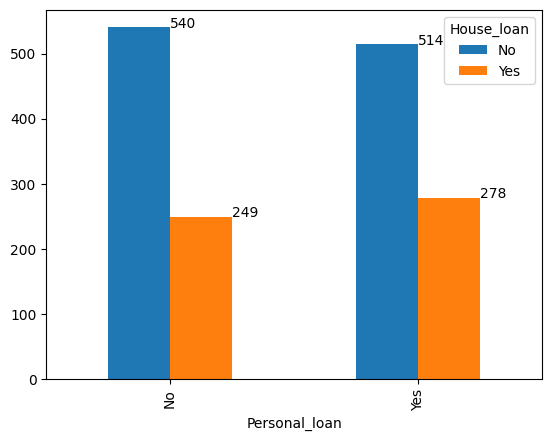

In [24]:
dfPlot=pd.crosstab(index=df['Personal_loan'], columns=df['House_loan'])
ax=dfPlot.plot.bar()
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

<AxesSubplot: xlabel='Marital_status'>

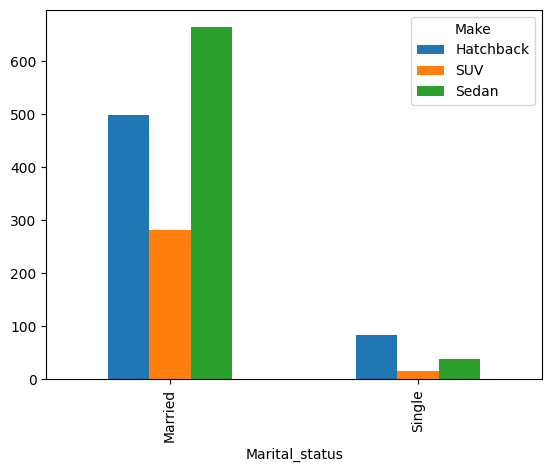

In [89]:
dfPlot=pd.crosstab(index=df['Marital_status'], columns=df['Make'])
dfPlot.plot.bar()

<AxesSubplot: xlabel='Price', ylabel='Age'>

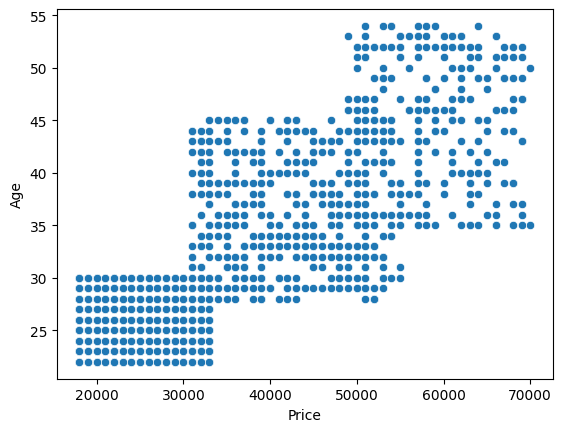

In [12]:
sns.scatterplot(x='Price', y='Age', data=df)

In [56]:
df1=pd.read_excel("godigt_cc_data.xlsx")

In [137]:
df1.head(5)
# df1.shape

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [128]:
df1.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [66]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


<AxesSubplot: xlabel='Issuer', ylabel='count'>

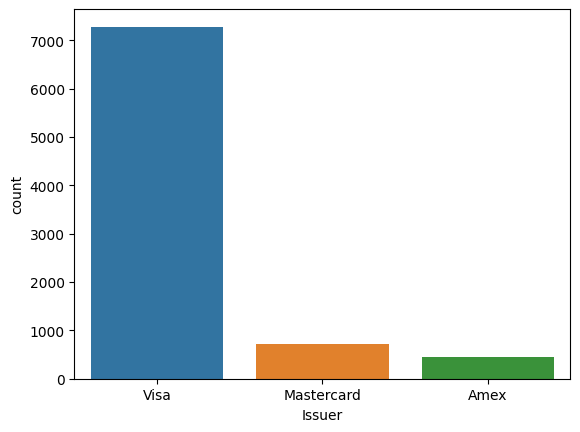

In [57]:
sns.countplot(x='Issuer', data=df1)

<AxesSubplot: xlabel='cc_limit'>

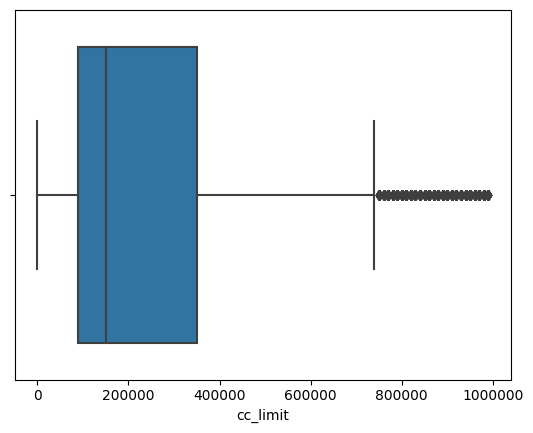

In [64]:
plt.ticklabel_format(style='plain')
# sns.histplot(x='cc_limit', data=df1)
sns.boxplot(x='cc_limit', data=df1)

<AxesSubplot: xlabel='annual_income_at_source'>

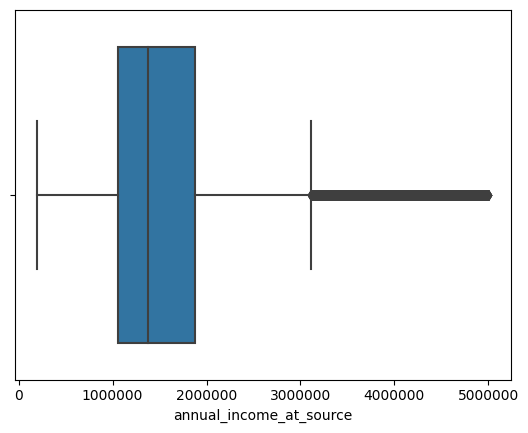

In [65]:

plt.ticklabel_format(style='plain')
# sns.histplot(x='cc_limit', data=df1)
sns.boxplot(x='annual_income_at_source', data=df1)

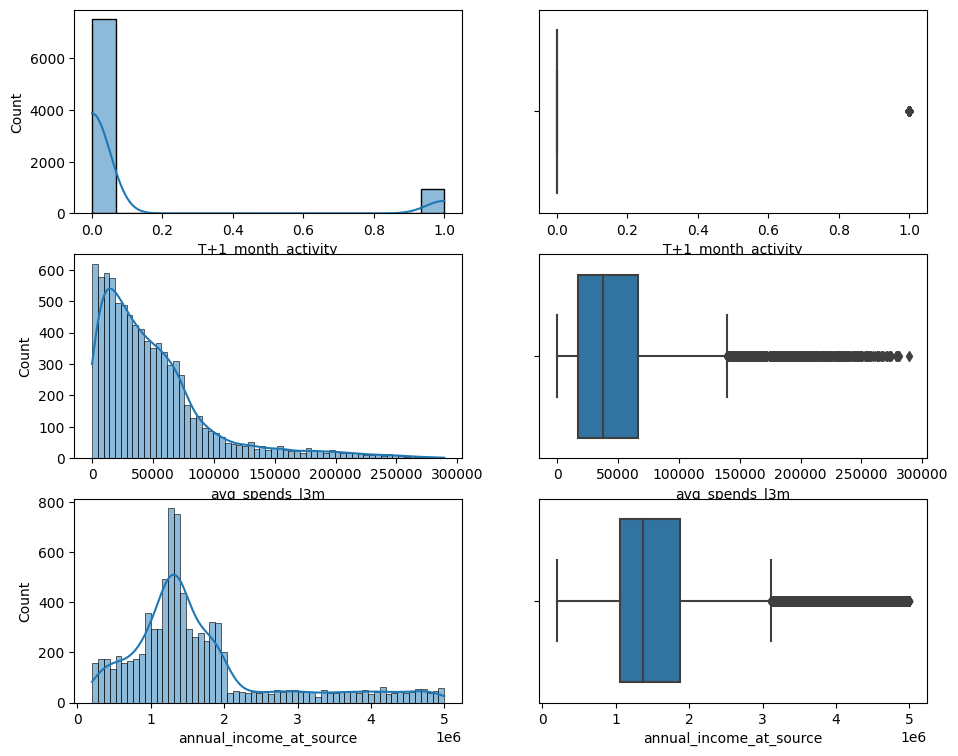

In [136]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(11,9))
sns.histplot(df1['T+1_month_activity'], kde=True, ax=axes[0][0])
sns.boxplot(x='T+1_month_activity', data=df1, ax=axes[0][1])
sns.histplot(df1['avg_spends_l3m'], kde=True, ax=axes[1][0])
sns.boxplot(x='avg_spends_l3m', data=df1, ax=axes[1][1])
sns.histplot(df1['annual_income_at_source'], kde=True, ax=axes[2][0])
sns.boxplot(x='annual_income_at_source', data=df1, ax=axes[2][1])
plt.show()

<AxesSubplot: xlabel='other_bank_cc_holding', ylabel='count'>

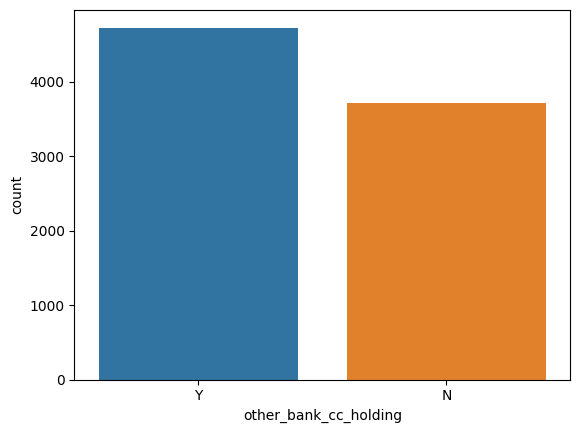

In [78]:
sns.countplot(x='other_bank_cc_holding', data=df1)

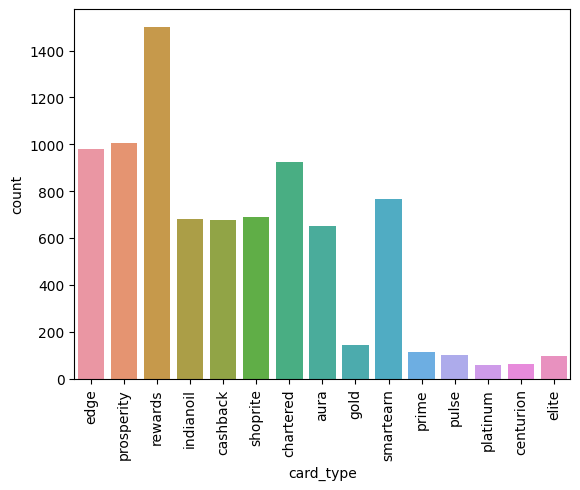

In [83]:
sns.countplot(x='card_type', data=df1)
plt.xticks(rotation=90)
plt.show()